In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
# sklearn imports

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

#SMOTE
from imblearn.over_sampling import SMOTE

### Load in min max scaled and preprocessed data

In [3]:
df = pd.read_csv('data/min_max_scaled')

In [4]:
df.head()

,Unnamed: 0,KIDSDRIV,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,TRAVTIME,BLUEBOOK,...,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,0,0.0,0.0,0.478261,0.183497,0.0,0.000000,0.0,0.065693,0.186547,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.478261,0.249159,0.0,0.290588,0.0,0.124088,0.196952,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.0,0.0,0.478261,0.144078,0.0,0.000000,0.0,0.153285,0.299971,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,0.0,0.2,0.434783,0.043699,0.0,0.140284,1.0,0.000000,0.036782,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4,0.0,0.0,0.608696,0.145844,0.0,0.345936,1.0,0.197080,0.204279,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.columns

Index(['KIDSDRIV', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG',
       'GEN_AGE', 'GENDER_M', 'GENDER_z_F', 'EDUCATION_<High School',
       'EDUCATION_Bachelors', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'EDUCATION_z_High School', 'OCCUPATION_Clerical', 'OCCUPATION_Doctor',
       'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager',
       'OCCUPATION_Professional', 'OCCUPATION_Student',
       'OCCUPATION_z_Blue Collar', 'CAR_USE_Commercial', 'CAR_USE_Private',
       'CAR_TYPE_Minivan', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup',
       'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'CAR_TYPE_z_SUV',
       'URBANICITY_Highly Urban/ Urban', 'URBANICITY_z_Highly Rural/ Rural'],
      dtype='object')

In [6]:
Claim_amt_frame = df.pop('CLM_AMT')

In [7]:
df.shape

(10302, 43)

In [8]:
flag = df.pop('CLAIM_FLAG')
df.insert(42, 'CLAIM_FLAG', flag)

In [9]:
X = df.iloc[:,0:42]

In [10]:
y = df.iloc[:, 42]

# KNN Classifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42,)


In [12]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
kn_pred = knn_model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test,kn_pred)
accuracy

0.707214493691362

In [17]:
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80      2268
         1.0       0.44      0.40      0.42       823

    accuracy                           0.71      3091
   macro avg       0.62      0.61      0.61      3091
weighted avg       0.70      0.71      0.70      3091



## Find the optimal k value that delivers the most no. of correct predictions

In [21]:
correct_sum = []

# Train the KNN model and compare predictions
for i in range(1,45):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)

    
    pred = model.predict(X_test)

    
    correct = np.sum(pred == y_test)
    correct_sum.append(correct)

Text(0, 0.5, 'Sum of correct predictions')

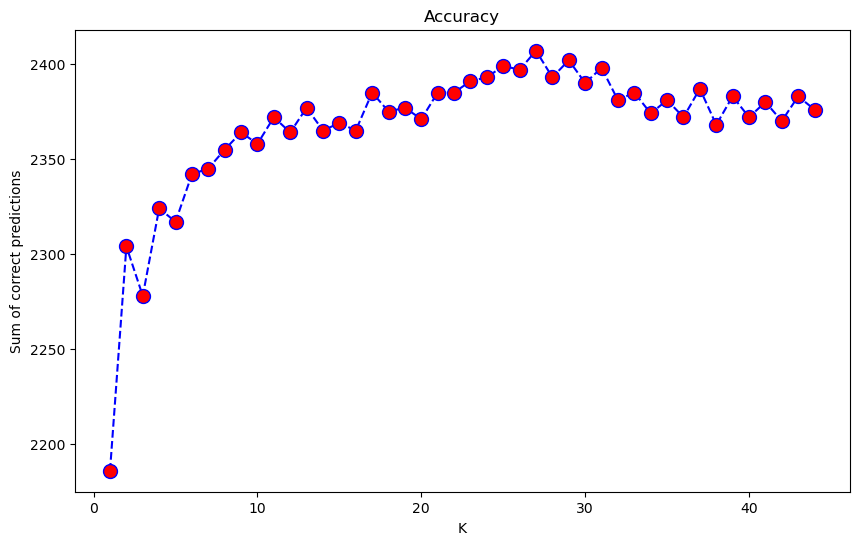

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,45),correct_sum,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy')
plt.xlabel('K')
plt.ylabel('Sum of correct predictions')

In [23]:
result = pd.DataFrame(data= correct_sum)
result.index = result.index+1
result.T

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
0,2186,2304,2278,2324,2317,2342,2345,2355,2364,2358,...,2381,2372,2387,2368,2383,2372,2380,2370,2383,2376


In [24]:
print(correct_sum)

[2186, 2304, 2278, 2324, 2317, 2342, 2345, 2355, 2364, 2358, 2372, 2364, 2377, 2365, 2369, 2365, 2385, 2375, 2377, 2371, 2385, 2385, 2391, 2393, 2399, 2397, 2407, 2393, 2402, 2390, 2398, 2381, 2385, 2374, 2381, 2372, 2387, 2368, 2383, 2372, 2380, 2370, 2383, 2376]


In [50]:
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train, y_train)
kn_pred = knn_model.predict(X_test)

In [57]:
knn_accuracy_score=accuracy_score(y_test,kn_pred)
knn_precision_score=precision_score(y_test,kn_pred)
knn_recall_score=recall_score(y_test,kn_pred)

print(knn_accuracy_score , knn_precision_score, knn_recall_score )

0.7761242316402459 0.6728232189973615 0.30984204131227217


In [58]:
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      2268
         1.0       0.67      0.31      0.42       823

    accuracy                           0.78      3091
   macro avg       0.73      0.63      0.64      3091
weighted avg       0.76      0.78      0.74      3091



### Check Training vs. Testing Accuracy to detect overfitting or underfitting

In [59]:
# Training accuracy
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Testing accuracy (already calculated in the notebook)
test_accuracy = accuracy_score(y_test, pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.7700734988212453
Testing Accuracy: 0.7686832740213523


#### The model performs slightly better on the training data compared to the testing data, but the difference is not very large. This suggests that the model is not heavily overfitting.

## Confusion Matrix

In [60]:
cm = confusion_matrix(y_test, kn_pred)

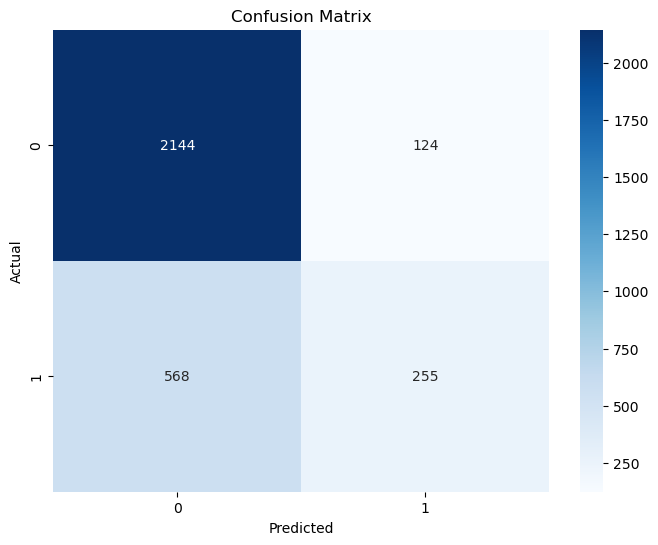

In [61]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

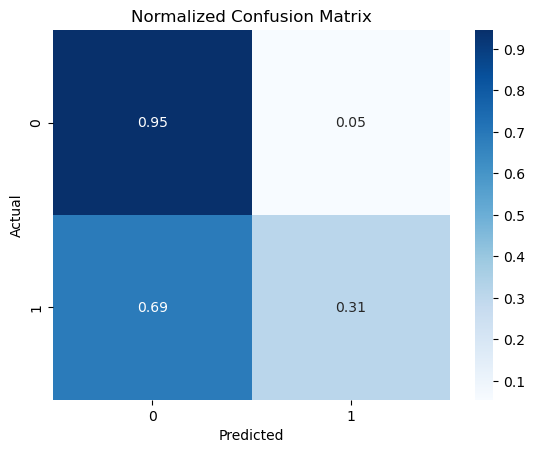

In [62]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Naive-Bayes Classifier

In [63]:
nb=MultinomialNB()

In [64]:
nb.fit(X_train,y_train)

MultinomialNB()

In [65]:
nb_pred=nb.predict(X_test)

In [72]:
nb_accuracy_score= accuracy_score(y_test,nb_pred)
nb_precision_score=precision_score(y_test,nb_pred)
nb_recall_score=recall_score(y_test,nb_pred)

print(knn_accuracy_score , knn_precision_score, knn_recall_score )

0.7761242316402459 0.6728232189973615 0.30984204131227217


### Classification Report

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86      2268
         1.0       0.69      0.23      0.35       823

    accuracy                           0.77      3091
   macro avg       0.74      0.60      0.60      3091
weighted avg       0.75      0.77      0.72      3091



### Confusion Matrix

Predictions: [0. 0. 0. 0. 1.]
True Labels: [0. 1. 0. 0. 1.]
Accuracy: 0.78
True Negatives (TN): 2093
False Positives (FP): 175
False Negatives (FN): 502
True Positives (TP): 321


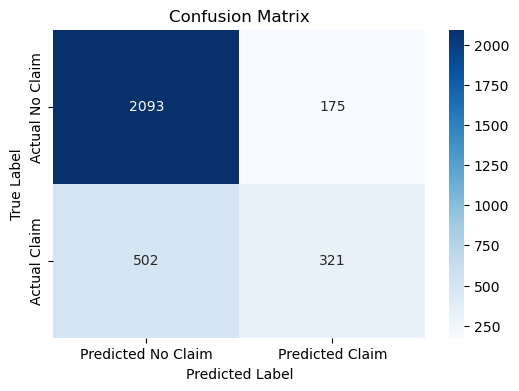

In [70]:
# Print first 5 predictions and corresponding true labels
print("Predictions:", nb_pred[:5])
print("True Labels:", y_test[:5].values)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, nb_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, nb_pred)

# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm.ravel()

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No Claim', 'Predicted Claim'],
            yticklabels=['Actual No Claim', 'Actual Claim'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

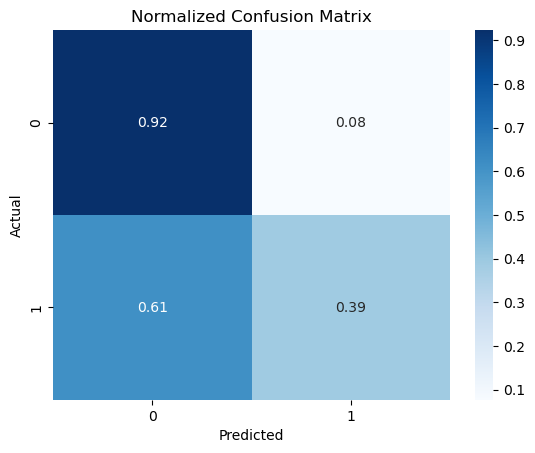

In [71]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Support Vector Classifier

In [74]:
svc_model = SVC(kernel='linear', random_state=42)

In [75]:

svc_model

SVC(kernel='linear', random_state=42)

In [76]:
svc_result = svc_model.fit(X_train,y_train)

In [77]:
svc_pred = svc_result.predict(X_test)

In [80]:
svc_accuracy_score=accuracy_score(y_test,svc_pred)
svc_precision_score=precision_score(y_test,svc_pred)
svc_recall_score=recall_score(y_test,svc_pred)

In [81]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87      2268
         1.0       0.73      0.38      0.50       823

    accuracy                           0.80      3091
   macro avg       0.77      0.67      0.69      3091
weighted avg       0.79      0.80      0.77      3091



--------

----------

In [76]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-validation Score:", grid.best_score_)

KeyboardInterrupt: 

In [ ]:
# Make predictions with the best model
best_svc = grid.best_estimator_
y_test_pred = best_svc.predict(x_temp)

# Evaluate the best model
print("Test Accuracy:", accuracy_score(y_temp, y_test_pred))
print(classification_report(y_temp, y_test_pred))

# Confusion Matrix for Test Set
confusion_mat_test = confusion_matrix(y_temp, y_test_pred)
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

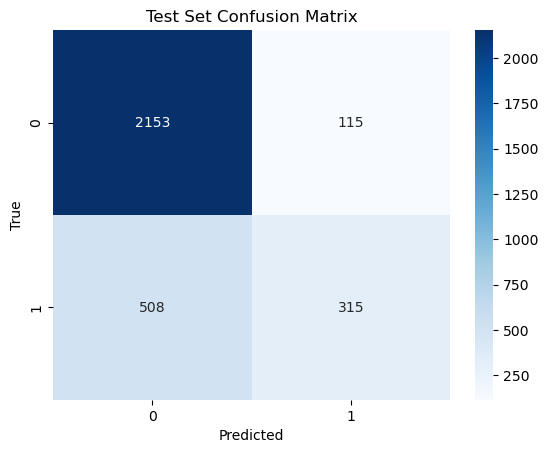

In [93]:
confusion_mat_test = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

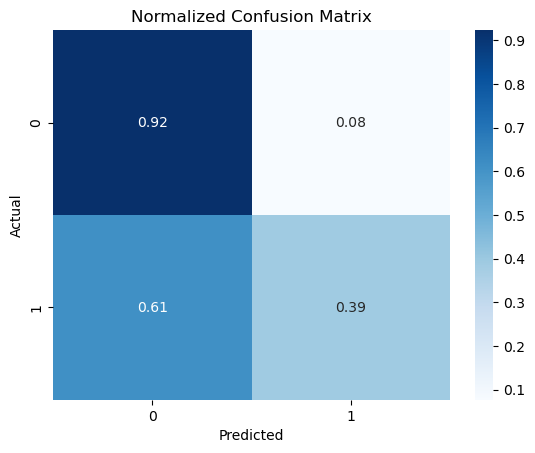

In [94]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Decision Tree Classifier

In [83]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=10, random_state = 42)

In [84]:
dt_result=dt_model.fit(X_train, y_train)

In [86]:
dt_pred = dt_result.predict(X_test)

### Model Evaluation

In [87]:
dt_accuracy_score=accuracy_score(y_test, dt_pred)
dt_precision_score=precision_score(y_test,dt_pred)
dt_recall_score=recall_score(y_test,dt_pred)

In [88]:
print(f'Classification Report: \n{classification_report(y_test, dt_pred)}')

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      2268
         1.0       0.57      0.42      0.48       823

    accuracy                           0.76      3091
   macro avg       0.69      0.65      0.66      3091
weighted avg       0.74      0.76      0.75      3091



In [89]:
cm = confusion_matrix(y_test, dt_pred)

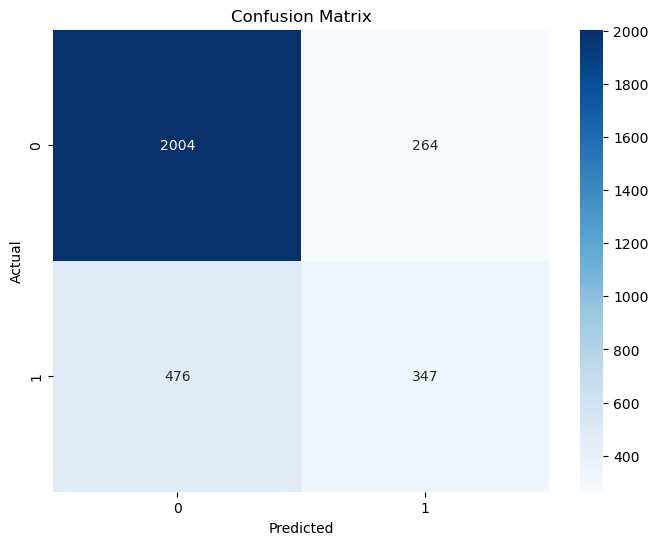

In [90]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

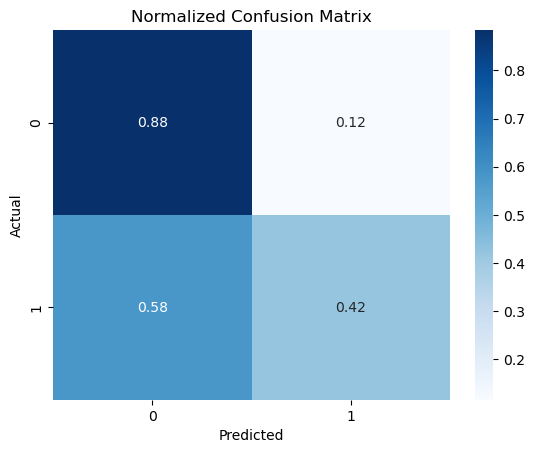

In [91]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Random Forest Classifier

In [93]:
rf = RandomForestClassifier(n_estimators = 2000, max_depth=26,min_samples_split=3, random_state=42)

In [94]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=26, min_samples_split=3, n_estimators=2000,
                       random_state=42)

In [95]:
rf_pred = rf.predict(X_test)

In [96]:
rf_accuracy_score = accuracy_score(y_test,rf_pred)
rf_precision_score=precision_score(y_test,rf_pred)
rf_recall_score=recall_score(y_test,kn_pred)

print(rf_accuracy_score , rf_precision_score, rf_recall_score )


0.8020058233581365 0.7328918322295805 0.30984204131227217


In [97]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88      2268
         1.0       0.73      0.40      0.52       823

    accuracy                           0.80      3091
   macro avg       0.77      0.68      0.70      3091
weighted avg       0.79      0.80      0.78      3091



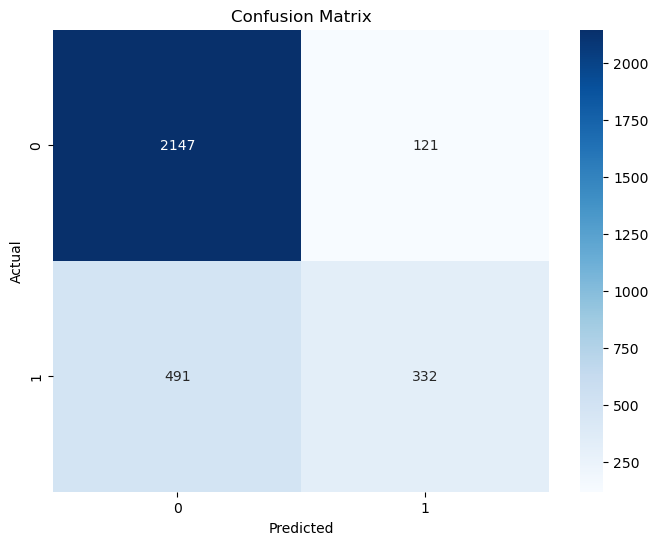

In [98]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

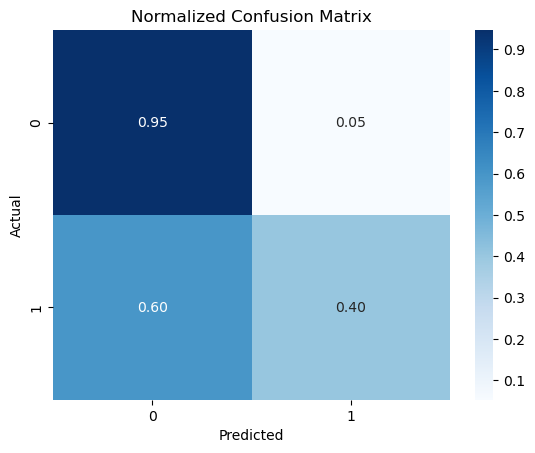

In [99]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Classifier Comparison



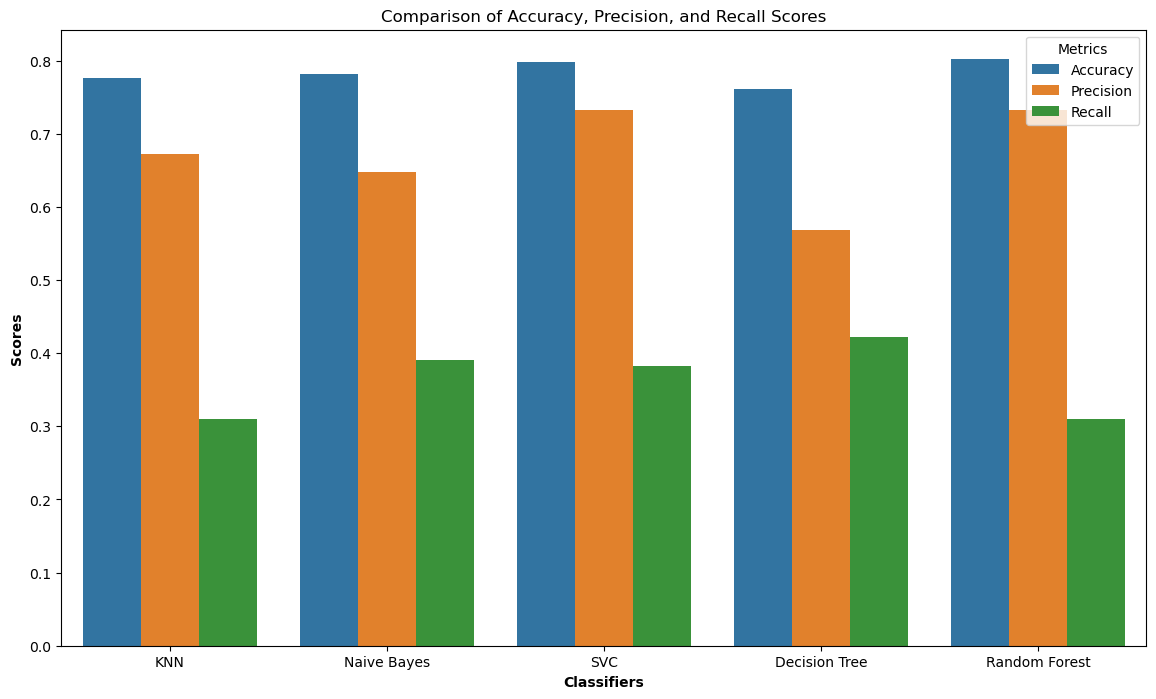

In [104]:

classifiers = ['KNN', 'Naive Bayes', 'SVC', 'Decision Tree', 'Random Forest']
accuracy_scores = [knn_accuracy_score, nb_accuracy_score, svc_accuracy_score, dt_accuracy_score, rf_accuracy_score]
precision_scores = [knn_precision_score, nb_precision_score, svc_precision_score, dt_precision_score, rf_precision_score]
recall_scores = [knn_recall_score, nb_recall_score, svc_recall_score, dt_recall_score, rf_recall_score]

data = {
    'Classifiers': classifiers,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}
df_plot = pd.DataFrame(data)
df_melted = df_plot.melt(id_vars='Classifiers', var_name='Metrics', value_name='Scores')


plt.figure(figsize=(14, 8))
sns.barplot(x='Classifiers', y='Scores', hue='Metrics', data=df_melted)
plt.xlabel('Classifiers', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparison of Accuracy, Precision, and Recall Scores')

plt.show()


### Accuracy pie chart

([<matplotlib.patches.Wedge at 0x2235eb05460>,
 [Text(0.8937936305867421, 0.6411964955632325, 'KNN'),
  Text(-0.3250680232112028, 1.0508714385145126, 'Naive Bayes'),
  Text(-1.0999893044342426, 0.004850786562106473, 'SVC'),
  Text(-0.35140416980750233, -1.0423603548878384, 'Decision Tree'),
  Text(0.8802960312362391, -0.6596051071586136, 'Random Forest')],
 [Text(0.4875237985018593, 0.34974354303449046, '19.81%'),
  Text(-0.17730983084247423, 0.5732026028260977, '19.93%'),
  Text(-0.5999941660550414, 0.0026458835793308033, '20.38%'),
  Text(-0.19167500171318305, -0.5685601935751845, '19.41%'),
  Text(0.4801614715834031, -0.35978460390469835, '20.47%')])

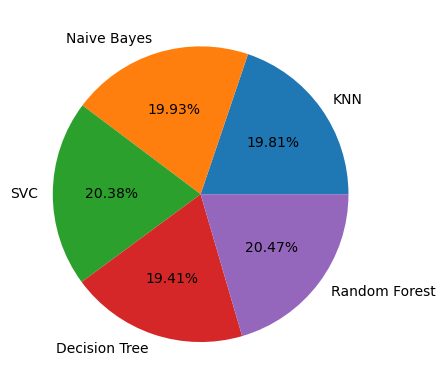

In [107]:
index = ['KNN', 'Naive Bayes', 'SVC', 'Decision Tree', 'Random Forest']
values = [knn_accuracy_score, nb_accuracy_score, svc_accuracy_score, dt_accuracy_score, rf_accuracy_score]

plt.pie(values, labels = index, autopct='%1.2f%%')